In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#https://www.w3schools.com/python/pandas/ref_df_describe.asp
#histograms & box plots @ https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/
#adding legend https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
import seaborn as sns
#import sys
#from datetime import datetime
#import csv
import pandas as pd
import plotly.express as px

# Introduction

## Read in C02 file and examine dataset

In [238]:
co2_nature = pd.read_excel('C02 Nature Paper.xlsx',sheet_name='3.  Composite CO2' ,skiprows=range(6))

co2_nature

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


In [239]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [240]:
co2_nature.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


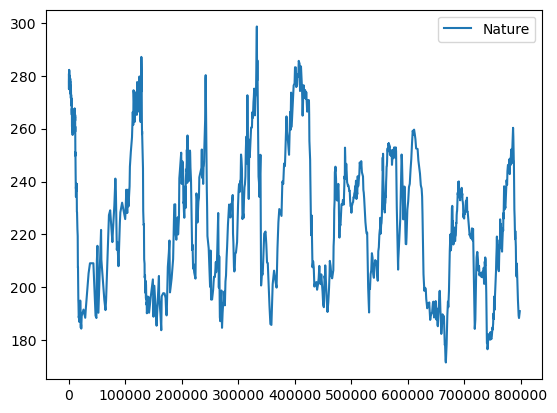

In [241]:
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'Nature')
plt.legend()
plt.show()

In [242]:
# Read the Excel file into a pandas DataFrame and exclude inital 14 rows
co2_ipcc = pd.read_excel('C02 IPCC Report.xlsx',sheet_name= 'CO2 Composite',skiprows=range(14))
co2_ipcc

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [243]:
co2_ipcc.columns = co2_ipcc.columns.str.lstrip()
co2_ipcc.columns = co2_ipcc.columns.str.rstrip()

In [244]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [245]:
co2_nature.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


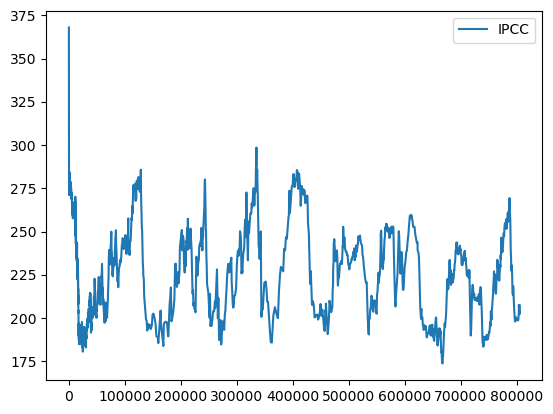

In [246]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'],label = 'IPCC')
plt.legend()
plt.show()

Remove blank spaces at beginning and end of string https://stackoverflow.com/questions/41476150/remove-or-replace-spaces-in-column-names

### Comparision of both C02 Datasets

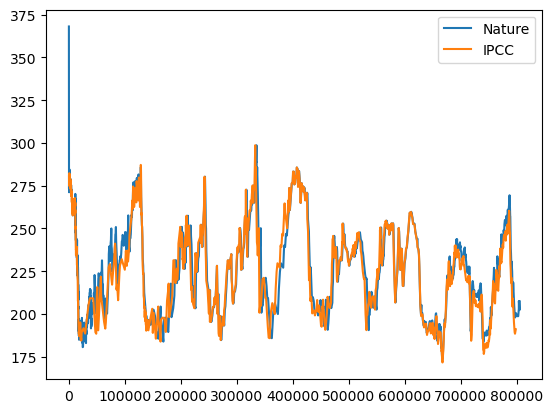

In [247]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'], label = 'Nature')
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'IPCC')
plt.legend()
plt.show()

### Mauna Loa CO2 dataset

In [248]:
co2_mauna_loa=pd.read_csv('Mauna Loa CO2.csv',skiprows=range(43))
co2_mauna_loa

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


In [249]:
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'year':'EDC3_gas_a (yr)'})))
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'mean':'CO2 (ppmv)'})))

In [250]:
co2_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
unc                float64
dtype: object

In [251]:
co2_mauna_loa.describe()

,EDC3_gas_a (yr),CO2 (ppmv),unc
count,64.000000,64.000000,6.400000e+01
mean,1990.500000,358.293437,1.200000e-01
std,18.618987,30.580414,9.791247e-17
min,1959.000000,315.980000,1.200000e-01
25%,1974.750000,330.895000,1.200000e-01
50%,1990.500000,355.075000,1.200000e-01
75%,2006.250000,382.572500,1.200000e-01
max,2022.000000,418.530000,1.200000e-01


Converting Mauna Loa data to match format of Nature CO2 dataset

In [252]:
co2_mauna_loa.columns = co2_mauna_loa.columns.str.lstrip()
co2_mauna_loa.columns = co2_mauna_loa.columns.str.rstrip()

In [253]:
base = 1950
co2_mauna_loa['EDC3_gas_a (yr)'] = base - co2_mauna_loa['EDC3_gas_a (yr)']

In [254]:
co2_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv),unc
0,-9,315.98,0.12
1,-10,316.91,0.12
2,-11,317.64,0.12
3,-12,318.45,0.12
4,-13,318.99,0.12
...,...,...,...
59,-68,408.72,0.12
60,-69,411.65,0.12
61,-70,414.21,0.12
62,-71,416.41,0.12


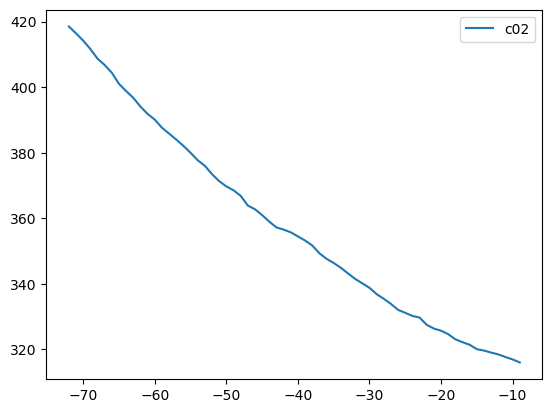

In [255]:
plt.plot(co2_mauna_loa['EDC3_gas_a (yr)'],co2_mauna_loa['CO2 (ppmv)'] ,label ='c02')
plt.legend()
plt.show()


In [256]:
co2_mauna_loa.columns = co2_mauna_loa.columns.str.lstrip()
co2_mauna_loa.columns = co2_mauna_loa.columns.str.rstrip()

In [257]:
co2_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv),unc
0,-9,315.98,0.12
1,-10,316.91,0.12
2,-11,317.64,0.12
3,-12,318.45,0.12
4,-13,318.99,0.12
...,...,...,...
59,-68,408.72,0.12
60,-69,411.65,0.12
61,-70,414.21,0.12
62,-71,416.41,0.12


comparing datasets before merging to ensure compatabillity

In [258]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [259]:
co2_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
unc                float64
dtype: object

In [260]:
co2_nature_mauna_loa = pd.concat([co2_mauna_loa, co2_nature])
co2_nature_mauna_loa = co2_nature_mauna_loa.drop(['unc'],axis =1)

In [261]:
co2_nature_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99
...,...,...
1091,794608,199.40
1092,795202,195.20
1093,796467,189.30
1094,797099,188.40


In [262]:
co2_nature_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99
...,...,...
1091,794608,199.40
1092,795202,195.20
1093,796467,189.30
1094,797099,188.40


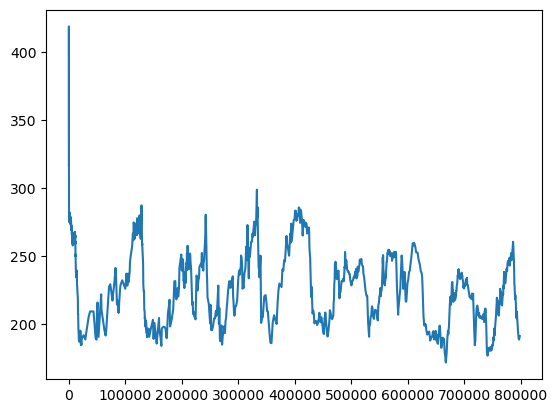

In [263]:
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'])
plt.show()

In [264]:
co2_nature_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [265]:
co2_nature_mauna_loa.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1160.000000,1160.000000
mean,369336.518103,237.867828
std,269951.176372,40.208643
min,-72.000000,171.600000
25%,114474.750000,208.875000
50%,390921.000000,233.800000
75%,608013.250000,257.250000
max,798512.000000,418.530000


In [266]:
co2_nature_mauna_loa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1160 non-null   int64  
 1   CO2 (ppmv)       1160 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 27.2 KB


# Reading in Temperature data

In [267]:
temp_jouzel=pd.read_csv('Temp Data Jouzel.csv',encoding='Latin')
#temp_noaa=pd.read_csv('Deuterium.csv',delimiter=r"\s+")
temp_jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


adding new column called differnce in order to comapare NOAA dataset and Jouzel dataset. once plotted, calculation is temp value from Jouzel minus *218.32 which gives .88 anomaly value in NOAA dataset

In [268]:
temp_jouzel['difference'] = temp_jouzel['temp'] - 218.32
temp_jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,difference
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,-0.02
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,-0.02
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,-0.02
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,-0.02
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,-0.02
...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-7.32
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-7.12
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-7.02
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-6.92


In [269]:
temp_jouzel['celsius'] = temp_jouzel['temp'] - 273.15

In [270]:
temp_jouzel.dtypes

bag               int64
ztop            float64
EDC3béta        float64
AICC2012        float64
deutfinal       float64
temp            float64
acc-EDC3beta    float64
difference      float64
celsius         float64
dtype: object

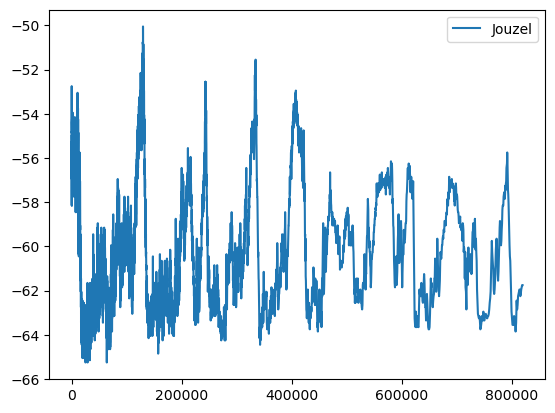

In [271]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'Jouzel')
plt.legend()
plt.show()

In [272]:
temp_noaa=pd.read_csv('Temp data NOAA.csv',skiprows=range(91),delimiter=r"\s+")
temp_noaa2=temp_noaa.dropna()

In [273]:
temp_noaa2

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.90,0.88
13,14,7.15,46.81203,-385.10,1.84
14,15,7.70,55.05624,-377.80,3.04
15,16,8.25,64.41511,-394.10,0.35
16,17,8.80,73.15077,-398.70,-0.42
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [274]:
temp_noaa.describe()

,Bag,ztop,Age,Deuterium,Temperature
count,5800.000000,5800.000000,5800.000000,5788.000000,5785.000000
mean,2900.500000,1594.725000,190016.390617,-417.579610,-4.580228
std,1674.460112,920.953062,192546.207239,20.359332,3.446971
min,1.000000,0.000000,-50.000000,-449.500000,-10.580000
25%,1450.750000,797.362500,46330.569350,-432.500000,-7.450000
50%,2900.500000,1594.725000,121793.340000,-421.300000,-5.200000
75%,4350.250000,2392.087500,272456.740000,-403.200000,-1.820000
max,5800.000000,3189.450000,801662.000000,0.950000,5.460000


In [275]:
temp_noaa.dtypes

Bag              int64
ztop           float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object

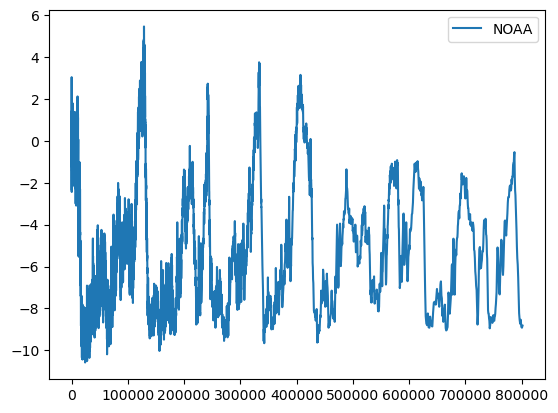

In [276]:
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

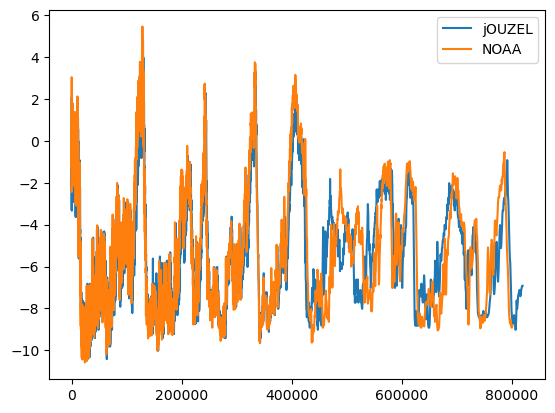

In [277]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['difference'], label = 'jOUZEL')
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

# Read in Irish weather

In [278]:
comp_irish_rainfall=pd.read_csv('Composite Rainfall Ireland.csv')


In [279]:
comp_irish_rainfall

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


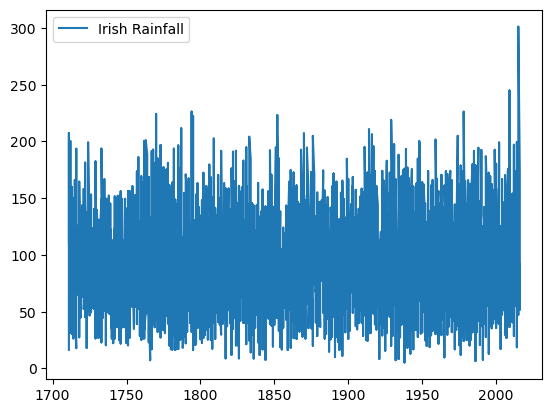

In [280]:
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Rainfall')
plt.legend()
plt.show()

### above graph messy so going to get yearly average

In [281]:
mean_yearly_irish_rainfall=comp_irish_rainfall

In [282]:
print(mean_yearly_irish_rainfall.head())

   Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1
2  1711      3                 121.2
3  1711      4                  85.2
4  1711      5                  66.6


In [283]:
yearly_averages = mean_yearly_irish_rainfall.groupby('Year')['Median montly series'].mean()
print(yearly_averages)

Year
1711     90.966667
1712    104.383333
1713     81.875000
1714     73.683333
1715    104.833333
           ...    
2012     98.641667
2013     93.041667
2014    105.225000
2015    112.166667
2016     88.391667
Name: Median montly series, Length: 306, dtype: float64


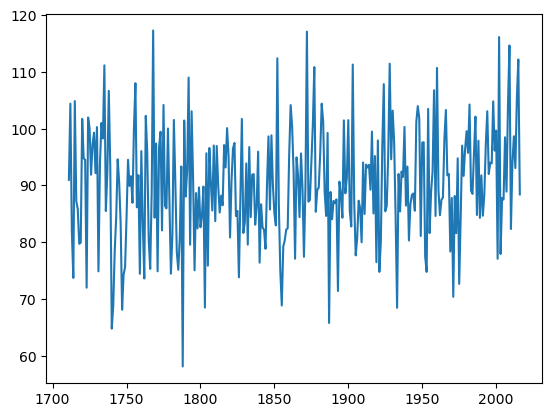

In [284]:
plt.plot(yearly_averages, label='Yearly Averages')

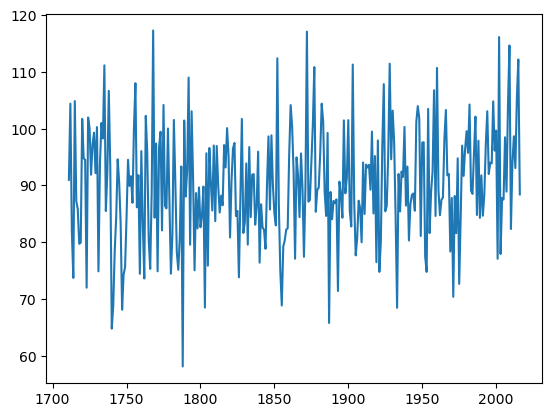

In [285]:
plt.plot(yearly_averages, label='Yearly Averages')

In [286]:
irish_temp=pd.read_csv('Ireland MeanTemperatures_1900-2022_annual.csv')

In [287]:
irish_temp

,year,Annual
0,2022,10.9
1,2021,10.5
2,2020,10.4
3,2019,10.5
4,2018,10.3
...,...,...
118,1904,9.1
119,1903,9.1
120,1902,9.2
121,1901,9.1


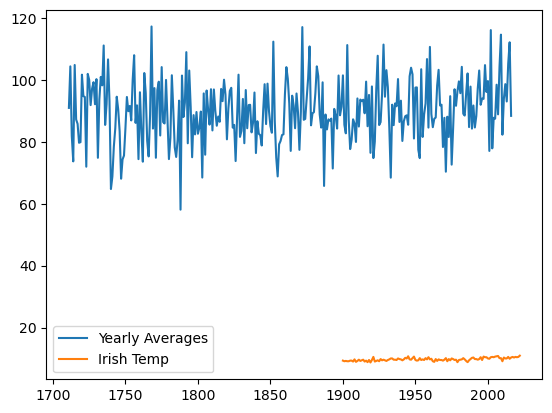

In [288]:
plt.plot(yearly_averages, label='Yearly Averages')
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.legend()
plt.show()

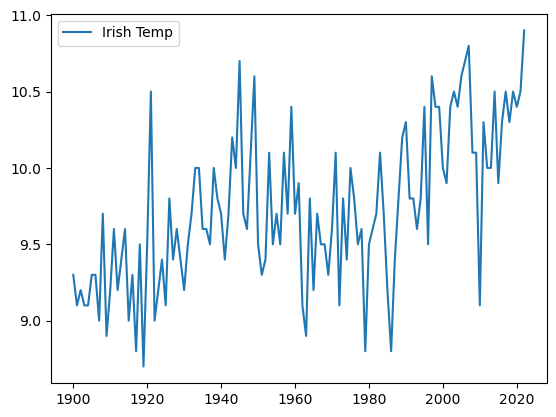

In [289]:
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.legend()
plt.show()

# Methane
https://data.world/datasets/methane

In [290]:
df17=pd.read_csv('Methane.csv',encoding='Latin')
df17

,EDC1999 depth,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble"
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


In [291]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt
methane_noaa=pd.read_csv('Methane NOAA.csv',encoding='Latin',delimiter=r"\s+")

In [292]:
methane_noaa.columns = methane_noaa.columns.str.lstrip()
methane_noaa.columns = methane_noaa.columns.str.rstrip()

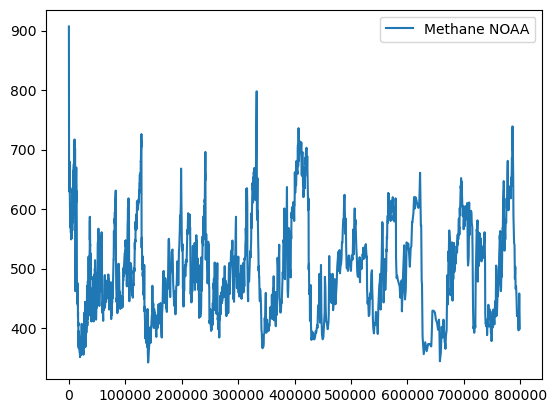

In [293]:
plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane NOAA')
plt.legend()
plt.show()

In [294]:
methane_noaa.dtypes

ï»¿Depth    float64
Age           int64
CH4_mean      int64
1s          float64
Lab.         object
dtype: object

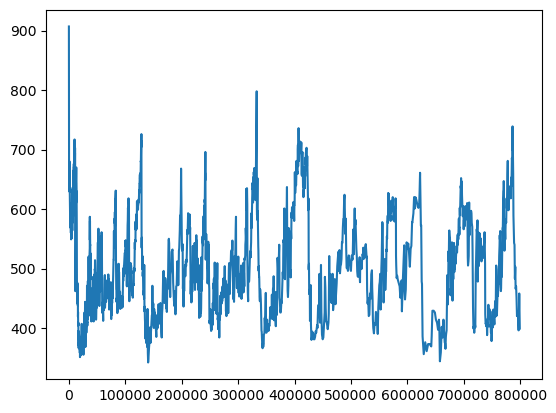

In [295]:
plt.plot(methane_noaa['Age'],methane_noaa['CH4_mean'], label = 'Methane')

In [296]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

#https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
#df1=pd.read_csv('summary.csv',delimiter=r"\s+")
#df1 = pd.read_csv("deter.csv",sep = " ")
#df1.describe()
#print(df1['Bag'])


In [297]:
result=pd.concat([co2_nature,co2_ipcc,temp_noaa,temp_jouzel,co2_mauna_loa],axis =1)
print(result)

      EDC3_gas_a (yr)  CO2 (ppmv)  Gasage (yr BP)  CO2 (ppmv)  \
0               137.0       280.4      -51.030000  368.022488   
1               268.0       274.9      -48.000000  361.780737   
2               279.0       277.9      -46.279272  359.647793   
3               395.0       279.1      -44.405642  357.106740   
4               404.0       281.9      -43.080000  353.946685   
...               ...         ...             ...         ...   
5814              NaN         NaN             NaN         NaN   
5815              NaN         NaN             NaN         NaN   
5816              NaN         NaN             NaN         NaN   
5817              NaN         NaN             NaN         NaN   
5818              NaN         NaN             NaN         NaN   

      sigma mean CO2 (ppmv)  Bag  ztop       Age  Deuterium  Temperature  ...  \
0                  0.060442  1.0  0.00 -50.00000        NaN          NaN  ...   
1                  0.370000  2.0  0.55 -43.54769        N

In [298]:
#https://researchdatapod.com/how-to-solve-python-typeerror-object-of-type-dataframe-is-not-json-serializable/
import json
json_str = result.to_csv()
with open('data.json', 'w') as f:
    json.dump(json_str, f)

In [299]:
merged1 = pd.concat([df17])

In [300]:
#int_age = "spacer"
#merged1 = pd.DataFrame({int_age})

In [301]:
#merged1 = pd.Series('Spacer')

In [302]:
merged1['blank1'] = 'SPACE'

In [303]:
merged2 = pd.concat([co2_nature,merged1,co2_ipcc,merged1,co2_mauna_loa,merged1,temp_noaa,merged1,temp_jouzel,merged1,comp_irish_rainfall,merged1,mean_yearly_irish_rainfall,merged1,irish_temp,merged1,methane_noaa],axis =1)

In [304]:
merged2

,EDC3_gas_a (yr),CO2 (ppmv),EDC1999 depth,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,Gasage (yr BP),CO2 (ppmv),...,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,ï»¿Depth,Age,CH4_mean,1s,Lab.
0,137.0,280.4,99.34,13.0,907.0,10.0,b,SPACE,-51.030000,368.022488,...,13.0,907.0,10.0,b,SPACE,99.34,13.0,907.0,10.0,b
1,268.0,274.9,102.45,126.0,784.0,10.0,g,SPACE,-48.000000,361.780737,...,126.0,784.0,10.0,g,SPACE,102.45,126.0,784.0,10.0,g
2,279.0,277.9,102.58,130.0,762.0,10.0,b,SPACE,-46.279272,359.647793,...,130.0,762.0,10.0,b,SPACE,102.58,130.0,762.0,10.0,b
3,395.0,279.1,103.34,151.0,710.0,10.0,g,SPACE,-44.405642,357.106740,...,151.0,710.0,10.0,g,SPACE,103.34,151.0,710.0,10.0,g
4,404.0,281.9,104.33,184.0,727.0,10.0,g,SPACE,-43.080000,353.946685,...,184.0,727.0,10.0,g,SPACE,104.33,184.0,727.0,10.0,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
merged2=merged2.dropna()

In [306]:
merged2

,EDC3_gas_a (yr),CO2 (ppmv),EDC1999 depth,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,Gasage (yr BP),CO2 (ppmv),...,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,ï»¿Depth,Age,CH4_mean,1s,Lab.
12,1153.0,277.7,112.14,459.0,670.0,10.0,g,SPACE,-36.616016,344.717769,...,459.0,670.0,10.0,g,SPACE,112.14,459.0,670.0,10.0,g
13,1233.0,278.7,113.03,478.0,644.0,10.0,b,SPACE,-36.143228,343.973677,...,478.0,644.0,10.0,b,SPACE,113.03,478.0,644.0,10.0,b
14,1350.0,277.4,114.67,533.0,670.0,10.0,g,SPACE,-35.762180,343.110752,...,533.0,670.0,10.0,g,SPACE,114.67,533.0,670.0,10.0,g
15,1453.0,279.2,114.78,539.0,668.0,10.0,g,SPACE,-34.916753,342.051976,...,539.0,668.0,10.0,g,SPACE,114.78,539.0,668.0,10.0,g
16,1552.0,280.0,115.22,554.0,680.0,10.0,g,SPACE,-33.076850,341.329297,...,554.0,680.0,10.0,g,SPACE,115.22,554.0,680.0,10.0,g
17,1638.0,278.9,118.48,668.0,667.0,10.0,b,SPACE,-33.025919,339.460489,...,668.0,667.0,10.0,b,SPACE,118.48,668.0,667.0,10.0,b
18,1733.0,278.7,118.74,678.0,669.0,10.0,g,SPACE,-29.142590,334.848556,...,678.0,669.0,10.0,g,SPACE,118.74,678.0,669.0,10.0,g
19,1812.0,278.0,120.85,736.0,680.0,10.0,b,SPACE,-26.796750,335.546953,...,736.0,680.0,10.0,b,SPACE,120.85,736.0,680.0,10.0,b
20,1931.0,276.9,121.15,742.0,643.0,10.0,b,SPACE,-26.670370,332.368956,...,742.0,643.0,10.0,b,SPACE,121.15,742.0,643.0,10.0,b
21,2057.0,276.7,124.34,861.0,664.0,10.0,g,SPACE,-25.570921,332.365686,...,861.0,664.0,10.0,g,SPACE,124.34,861.0,664.0,10.0,g


In [307]:
ver = pd.read_csv('combined_temp.csv')
ver

,EDC3_gas_a (yr),CO2 (ppmv),EDC1999 depth,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,Gasage (yr BP),CO2 (ppmv).1,...,gas age (edc3_gas_a).7,CH4 mean.7,1 s uncertainty.7,"Bern, Grenoble.7",blank1.7,ï»¿Depth,Age.1,CH4_mean,1s,Lab.
0,1153.0,277.7,112.14,459.0,670.0,10.0,g,SPACE,-36.616016,344.717769,...,459.0,670.0,10.0,g,SPACE,112.14,459.0,670.0,10.0,g
1,1233.0,278.7,113.03,478.0,644.0,10.0,b,SPACE,-36.143228,343.973677,...,478.0,644.0,10.0,b,SPACE,113.03,478.0,644.0,10.0,b
2,1350.0,277.4,114.67,533.0,670.0,10.0,g,SPACE,-35.762180,343.110752,...,533.0,670.0,10.0,g,SPACE,114.67,533.0,670.0,10.0,g
3,1453.0,279.2,114.78,539.0,668.0,10.0,g,SPACE,-34.916753,342.051976,...,539.0,668.0,10.0,g,SPACE,114.78,539.0,668.0,10.0,g
4,1552.0,280.0,115.22,554.0,680.0,10.0,g,SPACE,-33.076850,341.329297,...,554.0,680.0,10.0,g,SPACE,115.22,554.0,680.0,10.0,g
5,1638.0,278.9,118.48,668.0,667.0,10.0,b,SPACE,-33.025919,339.460489,...,668.0,667.0,10.0,b,SPACE,118.48,668.0,667.0,10.0,b
6,1733.0,278.7,118.74,678.0,669.0,10.0,g,SPACE,-29.142590,334.848556,...,678.0,669.0,10.0,g,SPACE,118.74,678.0,669.0,10.0,g
7,1812.0,278.0,120.85,736.0,680.0,10.0,b,SPACE,-26.796750,335.546953,...,736.0,680.0,10.0,b,SPACE,120.85,736.0,680.0,10.0,b
8,1931.0,276.9,121.15,742.0,643.0,10.0,b,SPACE,-26.670370,332.368956,...,742.0,643.0,10.0,b,SPACE,121.15,742.0,643.0,10.0,b
9,2057.0,276.7,124.34,861.0,664.0,10.0,g,SPACE,-25.570921,332.365686,...,861.0,664.0,10.0,g,SPACE,124.34,861.0,664.0,10.0,g


In [308]:
# #https://stackoverflow.com/questions/34926517/stop-sys-stdout-from-writing-to-a-text-file



https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file

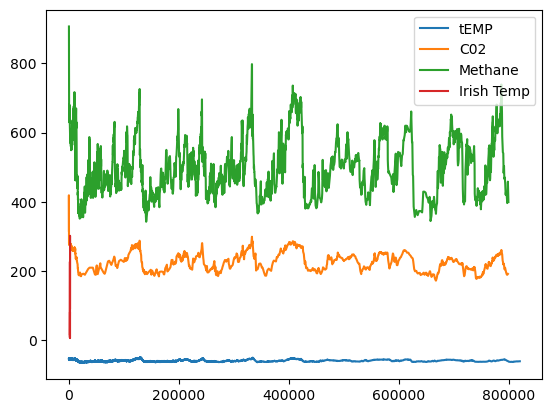

In [309]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'tEMP')
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'], label = 'C02')
plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane')
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Temp')
plt.legend()
plt.show()

In [310]:
#https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
merged2.to_csv('combined_temp.csv', encoding='utf-8', index=False)

In [311]:
#json_str = merged1.to_csv()

https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format

In [312]:
#https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format
co2_nature_mauna_loa.to_json('combined_temps.json',orient='records')

In [313]:
#temp_noaa2= temp_noaa.dropna()


In [314]:
co2_nature_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99
...,...,...
1091,794608,199.40
1092,795202,195.20
1093,796467,189.30
1094,797099,188.40


In [315]:
temp_noaa2

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.90,0.88
13,14,7.15,46.81203,-385.10,1.84
14,15,7.70,55.05624,-377.80,3.04
15,16,8.25,64.41511,-394.10,0.35
16,17,8.80,73.15077,-398.70,-0.42
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [316]:
from scipy.interpolate import interp1d
x = np.array(co2_nature["EDC3_gas_a (yr)"])
y = np.array(co2_nature["CO2 (ppmv)"])

In [317]:
x

array([   137,    268,    279, ..., 796467, 797099, 798512], dtype=int64)

In [318]:
y

array([280.4, 274.9, 277.9, ..., 189.3, 188.4, 191. ])

In [319]:
f = interp1d(x, y, kind="linear")

In [320]:
int_age = np.linspace(x[0], x[-1], 5785)

# Interpolate the values of y using the new array and the interpolation function
int_co2 = f(int_age)

In [321]:
int_age

array([1.37000000e+02, 2.75031639e+02, 4.13063278e+02, ...,
       7.98235937e+05, 7.98373968e+05, 7.98512000e+05])

In [322]:
int_co2

array([280.4       , 276.81771973, 281.43005225, ..., 190.49202794,
       190.74601397, 191.        ])

In [323]:
dfa = pd.DataFrame({'year': int_age, 'CO2': int_co2})


In [324]:
dfa.dtypes

year    float64
CO2     float64
dtype: object

In [325]:
temp_noaa2

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.90,0.88
13,14,7.15,46.81203,-385.10,1.84
14,15,7.70,55.05624,-377.80,3.04
15,16,8.25,64.41511,-394.10,0.35
16,17,8.80,73.15077,-398.70,-0.42
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [326]:
x = dfa["CO2"]
y = temp_noaa2["Temperature"]
        
r = np.corrcoef(x,y)
print("Correlation coefficient: between C02 & Temperature is ", r)
r

Correlation coefficient: between C02 & Temperature is  [[1.         0.15923165]
 [0.15923165 1.        ]]


array([[1.        , 0.15923165],
       [0.15923165, 1.        ]])

In [327]:
dfa.to_csv('interpolated.csv', encoding='utf-8')

In [328]:
dfi=pd.read_csv('interpolated.csv')
dfi

,Unnamed: 0,year,CO2
0,0,137.000000,280.400000
1,1,275.031639,276.817720
2,2,413.063278,281.430052
3,3,551.094917,280.736793
4,4,689.126556,281.761393
...,...,...,...
5780,5780,797959.873444,189.984056
5781,5781,798097.905083,190.238042
5782,5782,798235.936722,190.492028
5783,5783,798373.968361,190.746014


In [329]:
#co2_nature_mauna_loai = pd.concat(int_age,int_co2)

In [330]:
dfa.shape

(5785, 2)

In [331]:
dfa.shape

(5785, 2)

In [332]:
dfa.describe()

,year,CO2
count,5785.000000,5785.000000
mean,399324.500000,223.812813
std,230530.779174,25.423352
min,137.000000,171.693951
25%,199730.750000,202.972689
50%,399324.500000,222.284586
75%,598918.250000,241.652120
max,798512.000000,298.053853


In [333]:
temp_noaa2

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.90,0.88
13,14,7.15,46.81203,-385.10,1.84
14,15,7.70,55.05624,-377.80,3.04
15,16,8.25,64.41511,-394.10,0.35
16,17,8.80,73.15077,-398.70,-0.42
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


MACHINELEARNINGMASTERY.COM
FREQUENCY ANALYSIS ??

In [334]:
r = np.corrcoef(temp_noaa2.loc[:1110,'Temperature'],co2_nature.loc[:1096, "CO2 (ppmv)"])
print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is ", r)
r

Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is  [[1.         0.35828066]
 [0.35828066 1.        ]]


array([[1.        , 0.35828066],
       [0.35828066, 1.        ]])

In [335]:
r = np.corrcoef(co2_nature.loc[:1096, "CO2 (ppmv)"],temp_jouzel.loc[:1095,'celsius'])
print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is ", r)
r

Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is  [[1.         0.34183475]
 [0.34183475 1.        ]]


array([[1.        , 0.34183475],
       [0.34183475, 1.        ]])

In [336]:
r = np.corrcoef(temp_jouzel.loc[:1095,'celsius'],df17.loc[:1095,'CH4 mean'])
print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is ", r)
r

Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is  [[1.         0.19854202]
 [0.19854202 1.        ]]


array([[1.        , 0.19854202],
       [0.19854202, 1.        ]])

In [337]:
r = np.corrcoef(co2_nature.loc[:1096, "CO2 (ppmv)"],df17.loc[:1095,'CH4 mean'])
print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is ", r)
r

Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is  [[1.         0.07641491]
 [0.07641491 1.        ]]


array([[1.        , 0.07641491],
       [0.07641491, 1.        ]])

In [338]:
temp_noaa

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [339]:
r = np.corrcoef(co2_nature.loc[:1096,"CO2 (ppmv)"],temp_noaa.loc[:1095,"Temperature"])
r

array([[ 1., nan],
       [nan, nan]])

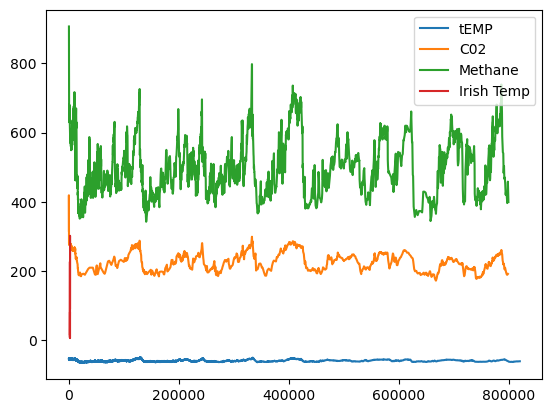

In [340]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'tEMP')
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'], label = 'C02')
plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane')
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Temp')
plt.legend()
plt.show()

# Fourier transform 

In [341]:
from scipy.fft import fft, fftfreq
import pandas as pd
import scipy.fft
# Read the dataset from a CSV file
#df = pd.read_excel('C02 Nature Paper.xlsx',sheet_name='3.  Composite CO2' ,skiprows=range(6))

# Select the column with CO2 (ppmv) values
y = co2_nature['CO2 (ppmv)']
y = np.ascontiguousarray(y)


In [342]:
yf = fft(y) # Frequency spectrum
xf = fftfreq(y.size)

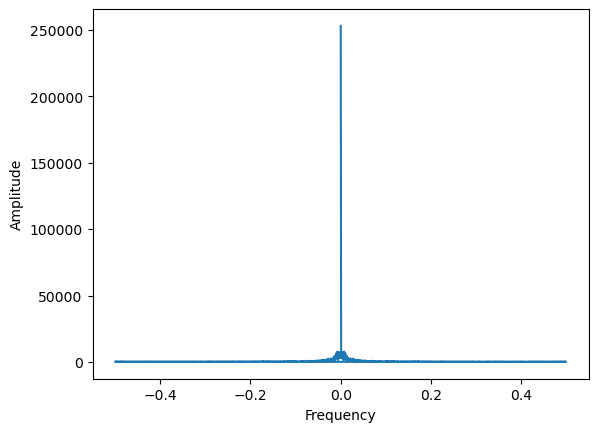

In [343]:
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()